<a href="https://colab.research.google.com/github/CristonLewin/DAP-Capstone-Project/blob/main/Cap_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imporing required libraries

import numpy as np
import numpy.random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from requests.auth import HTTPBasicAuth
from requests.auth import HTTPDigestAuth
from geopy.geocoders import Nominatim
from datetime import timedelta

In [2]:
# Importing Datasets to colab enviroment from Microsoft OneDrive

resid1 = '86516661A665CDF3%2157880'
authkey = '%21AEKz7uhL6B7MUFg'
url1_excel = ('https://onedrive.live.com/download?'
              + 'resid=' + resid1
              + '&authkey=' + authkey
              + '&em=2&app=Excel')

UK_HPI = pd.read_excel(url1_excel)

In [3]:
# Dropping columns

UK_HPI1 = UK_HPI.drop(['OldSalesVolume', 'Old12m%Change', 'Old1m%Change', 'AveragePriceSA', 'IndexSA',
                       'New12m%Change', 'New1m%Change', 'FOO12m%Change', 'FOO1m%Change',
                       'FTB12m%Change', 'FTB1m%Change', 'Mortgage12m%Change', 'Flat12m%Change',
                       'Mortgage1m%Change', 'Cash12m%Change', 'Cash1m%Change','Flat1m%Change',
                       'Terraced12m%Change', 'Terraced1m%Change', 'SemiDetached12m%Change', 'SemiDetached1m%Change',
                       'Detached12m%Change','Detached1m%Change','12m%Change', '1m%Change', 'DetachedPrice', 'DetachedIndex',
                       'SemiDetachedPrice', 'SemiDetachedIndex', 'TerracedPrice', 'TerracedIndex',
                       'FlatPrice', 'FlatIndex',
                       'FTBPrice', 'FTBIndex', 'FOOPrice', 'FOOIndex',], axis=1)



# Viewind Datasets
UK_HPI1

,Date,RegionName,AreaCode,AveragePrice,Index,SalesVolume,CashPrice,CashIndex,CashSalesVolume,MortgagePrice,MortgageIndex,MortgageSalesVolume,NewPrice,NewIndex,NewSalesVolume,OldPrice,OldIndex
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,388.0,NaN,NaN,NaN,NaN,NaN,NaN,88436.13953,40.267250,103.0,81043.95084,40.883367
1,2004-01-02,Aberdeenshire,S12000034,81678.76231,40.856757,326.0,NaN,NaN,NaN,NaN,NaN,NaN,88606.44649,40.344795,107.0,80965.29542,40.843688
2,2004-01-03,Aberdeenshire,S12000034,83525.09702,41.780317,453.0,NaN,NaN,NaN,NaN,NaN,NaN,90296.91375,41.114508,140.0,82903.23948,41.821302
3,2004-01-04,Aberdeenshire,S12000034,84333.67900,42.184780,571.0,NaN,NaN,NaN,NaN,NaN,NaN,90319.87844,41.124964,180.0,84003.99161,42.376586
4,2004-01-05,Aberdeenshire,S12000034,86379.95396,43.208353,502.0,NaN,NaN,NaN,NaN,NaN,NaN,91989.17763,41.885039,167.0,86222.73484,43.495852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115606,2023-01-11,Yorkshire and The Humber,E12000003,207712.00000,152.500000,4777.0,198061.0,150.2,1521.0,212558.0,153.6,2725.0,282116.00000,169.900000,46.0,204682.00000,152.500000
115607,2023-01-12,Yorkshire and The Humber,E12000003,205804.00000,151.100000,3840.0,195921.0,148.6,1129.0,210748.0,152.3,2016.0,277658.00000,167.200000,72.0,202861.00000,151.100000
115608,2024-01-01,Yorkshire and The Humber,E12000003,204859.00000,150.400000,2043.0,195085.0,148.0,480.0,209752.0,151.6,847.0,292927.00000,176.400000,15.0,201415.00000,150.000000
115609,2024-01-02,Yorkshire and The Humber,E12000003,205335.00000,150.800000,NaN,195351.0,148.2,NaN,210338.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Renaming column
UK_HPI1.rename(columns={'RegionName': 'City_Town'}, inplace=True)
UK_HPI1.head()

,Date,City_Town,AreaCode,AveragePrice,Index,SalesVolume,CashPrice,CashIndex,CashSalesVolume,MortgagePrice,MortgageIndex,MortgageSalesVolume,NewPrice,NewIndex,NewSalesVolume,OldPrice,OldIndex
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,388.0,NaN,NaN,NaN,NaN,NaN,NaN,88436.13953,40.267250,103.0,81043.95084,40.883367
1,2004-01-02,Aberdeenshire,S12000034,81678.76231,40.856757,326.0,NaN,NaN,NaN,NaN,NaN,NaN,88606.44649,40.344795,107.0,80965.29542,40.843688
2,2004-01-03,Aberdeenshire,S12000034,83525.09702,41.780317,453.0,NaN,NaN,NaN,NaN,NaN,NaN,90296.91375,41.114508,140.0,82903.23948,41.821302
3,2004-01-04,Aberdeenshire,S12000034,84333.67900,42.184780,571.0,NaN,NaN,NaN,NaN,NaN,NaN,90319.87844,41.124964,180.0,84003.99161,42.376586
4,2004-01-05,Aberdeenshire,S12000034,86379.95396,43.208353,502.0,NaN,NaN,NaN,NaN,NaN,NaN,91989.17763,41.885039,167.0,86222.73484,43.495852


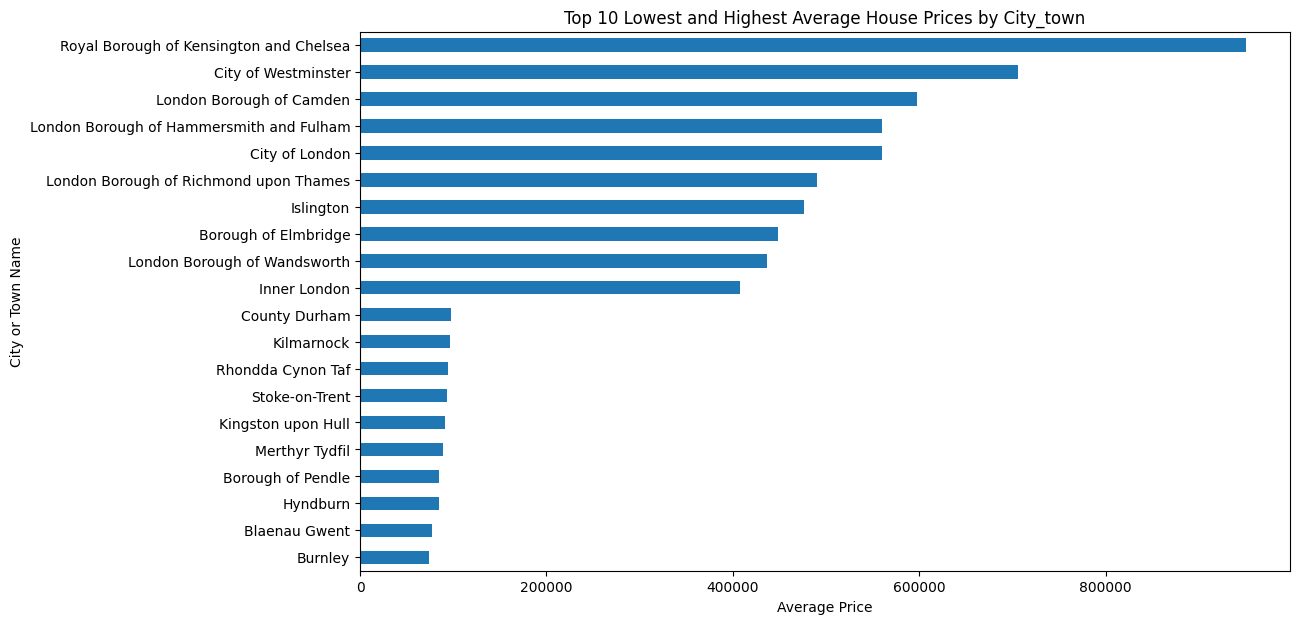

In [5]:
# Getting average House Price by City_Town (Top 10 & Bottom 10)

# Convert 'AveragePrice' to numeric
UK_HPI1['AveragePrice'] = pd.to_numeric(UK_HPI1['AveragePrice'], errors='coerce')

# Calculate mean prices and sort
mean_prices = UK_HPI1.groupby('City_Town')['AveragePrice'].mean().sort_values()

# Selecting top and bottom 10
top_10 = mean_prices.tail(10)
bottom_10 = mean_prices.head(10)

plt.figure(figsize=(12, 7))
pd.concat([bottom_10, top_10]).plot(kind='barh', stacked=True)
plt.ylabel('City or Town Name')
plt.xlabel('Average Price')
plt.title('Top 10 Lowest and Highest Average House Prices by City_town')
plt.show()

Error retrieving temperature data for Hyndburn.
Error retrieving temperature data for Borough of Pendle.
Error retrieving temperature data for Inner London.
Error retrieving temperature data for Borough of Elmbridge.
Error retrieving temperature data for London Borough of Hammersmith and Fulham.
Error retrieving temperature data for Royal Borough of Kensington and Chelsea.


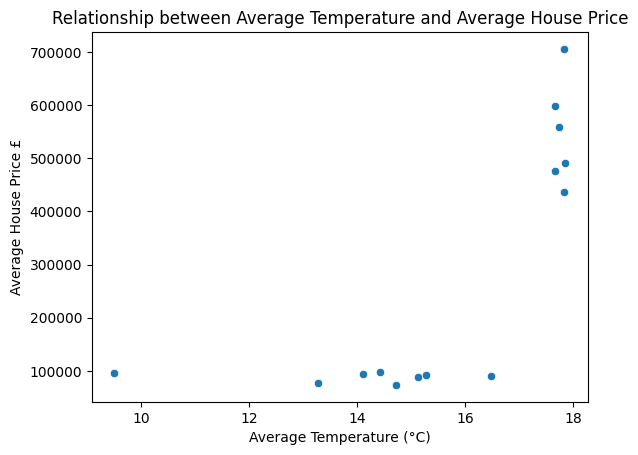

In [6]:
# Getting City_Town names from bottom_10 and top_10 then use OpenWeather API to fetch the average temperature for each.

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract City_Town names from bottom_10 and top_10
city_list = list(bottom_10.index) + list(top_10.index)

# Empty lists for storing temperature and average price data
temperature_data = []
average_price_data = []
valid_cities = []

# Define API key and base URL
api_key = "a1d10cca565ad133f4c07772246d8d80"
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Loop through each City_Town in the list
for city in city_list:
    complete_url = base_url + "?q=" + city + "&appid=" + api_key
    response = requests.get(complete_url).json()

    try:
        temperature = response["main"]["temp"] - 273.15  # Convert Kelvin to Celsius
        temperature_data.append(temperature)
        average_price_data.append(UK_HPI1[UK_HPI1["City_Town"] == city]["AveragePrice"].mean())
        valid_cities.append(city)
    except KeyError:
        # Skip the current city if API is not able to find location
        print(f"Error retrieving temperature data for {city}.")

# Creating a DataFrame City_Town
df = pd.DataFrame({
    "City_Town": valid_cities,
    "Average Temperature": temperature_data,
    "Average Price": average_price_data
})

# Sort the DataFrame by Average Price
df = df.sort_values(by="Average Price")

# Plot the relationship between Average Temperature and Average Price
sns.scatterplot(data=df, x="Average Temperature", y="Average Price")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Average House Price £")
plt.title("Relationship between Average Temperature and Average House Price")
plt.show()

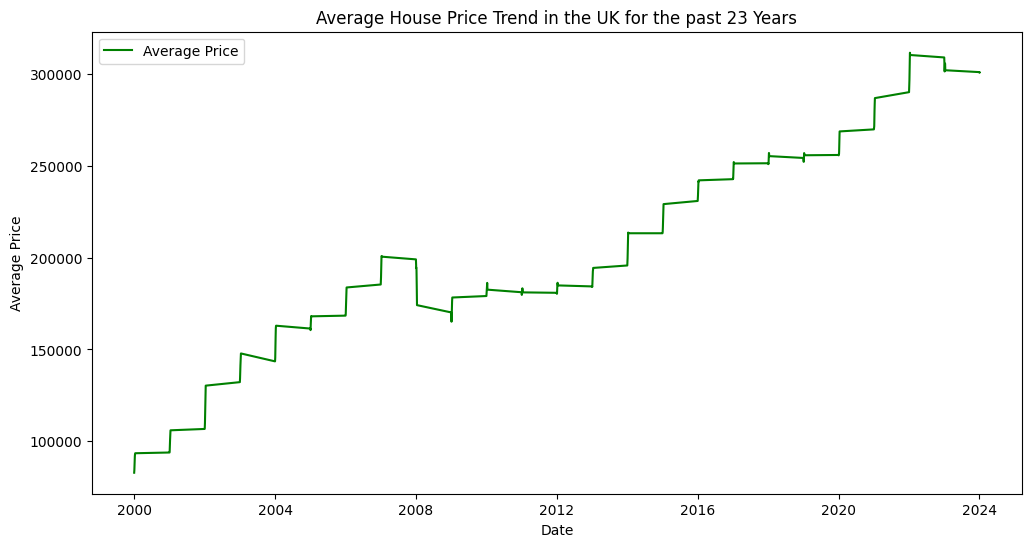

In [7]:
# Aggregate data to see the Average Price Trend for the past 23 years
aggregated_data = UK_HPI1.groupby('Date')['AveragePrice'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(aggregated_data['Date'], aggregated_data['AveragePrice'], label='Average Price', color='green')
plt.title('Average House Price Trend in the UK for the past 23 Years')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()


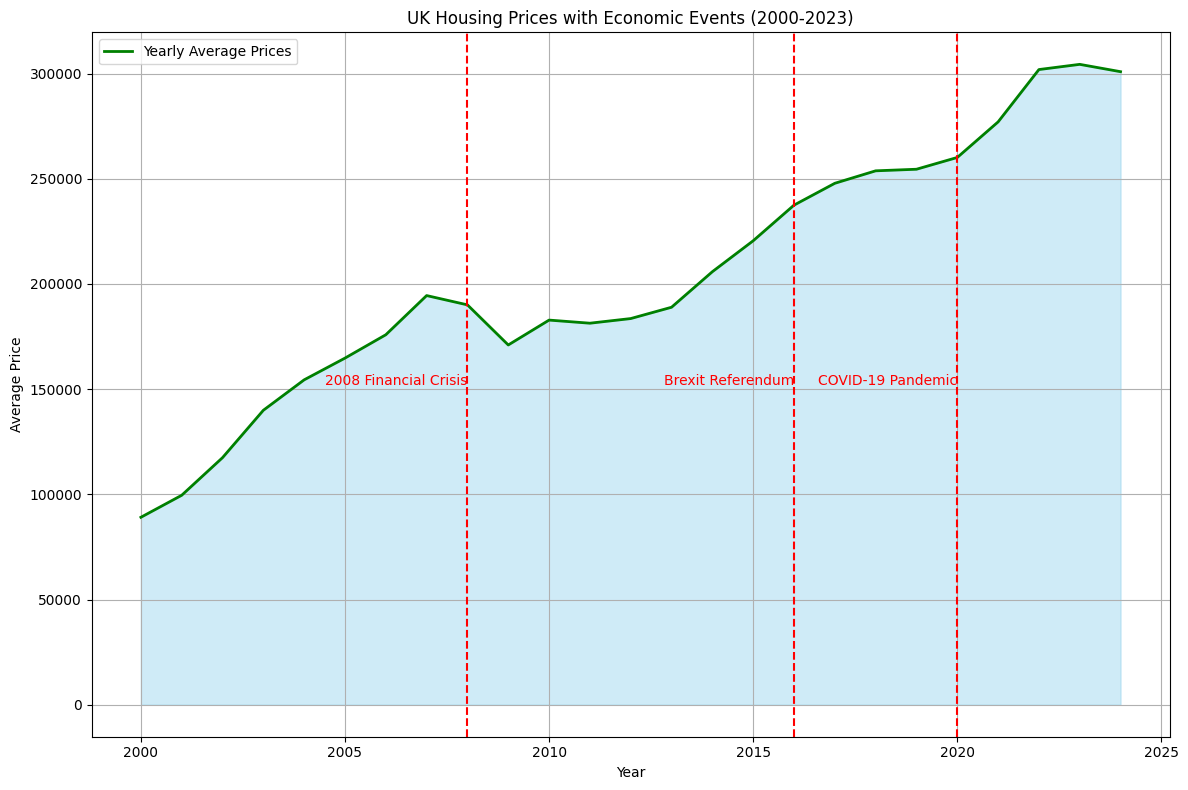

In [8]:
# Viewing previous economic events to see how they affect the housing price

UK_HPI1_yearly = UK_HPI1.groupby(UK_HPI1['Date'].dt.year)['AveragePrice'].mean().reset_index(name='AveragePrice')
UK_HPI1_yearly = UK_HPI1_yearly.rename(columns={'Date': 'Year'})

plt.figure(figsize=(12, 8))
plt.fill_between(UK_HPI1_yearly['Year'], UK_HPI1_yearly['AveragePrice'], color='skyblue', alpha=0.4)
plt.plot(UK_HPI1_yearly['Year'], UK_HPI1_yearly['AveragePrice'], label='Yearly Average Prices', linewidth=2, color='green')

# Highlighting specific economic events on the time series plot
events = {
    '2008 Financial Crisis': '2008',
    'Brexit Referendum': '2016',
    'COVID-19 Pandemic': '2020'
}

for event, year in events.items():
    plt.axvline(int(year), color='red', linestyle='--')
    plt.text(int(year), UK_HPI1_yearly['AveragePrice'].max() * 0.5, event, rotation=0, horizontalalignment='right', fontsize=10, color='red')

plt.title('UK Housing Prices with Economic Events (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Calculating the average price of property in the UK..

average_price_uk = UK_HPI1['AveragePrice'].mean()
print(f"Average property price in the UK: {average_price_uk}")


Average property price in the UK: 202609.46299350262


In [10]:
# Calculating the average price of property in the UK. CashPrice vs MortgagePrice.

average_cash_price = UK_HPI1['CashPrice'].mean()
average_mortgage_price = UK_HPI1['MortgagePrice'].mean()


print(f"Average cash price in the UK: {average_cash_price}")
print(f"Average mortgage price in the UK: {average_mortgage_price}")


Average cash price in the UK: 241427.73987522582
Average mortgage price in the UK: 252798.60222186646


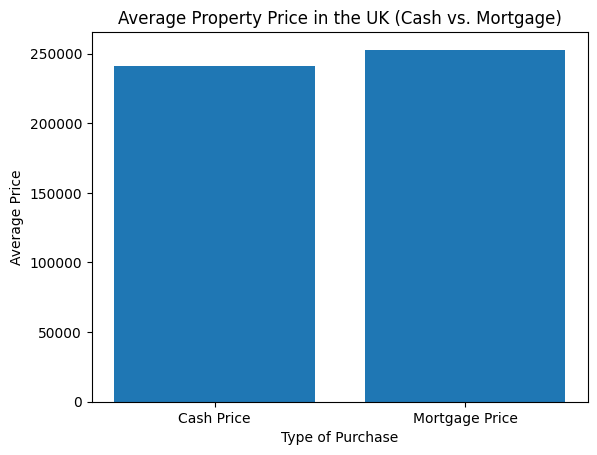

In [11]:
# Calculating the average price of property in the UK. CashPrice vs MortgagePrice.

average_cash_price = UK_HPI1['CashPrice'].mean()
average_mortgage_price = UK_HPI1['MortgagePrice'].mean()

plt.bar(['Cash Price', 'Mortgage Price'], [average_cash_price, average_mortgage_price])
plt.title('Average Property Price in the UK (Cash vs. Mortgage)')
plt.xlabel('Type of Purchase')
plt.ylabel('Average Price')

plt.show()

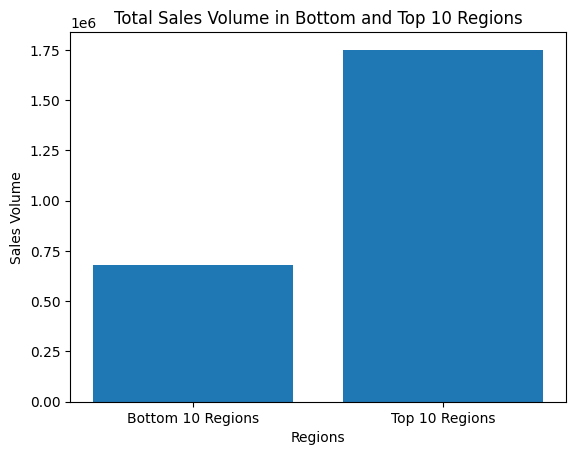

Total Sales Volume in Bottom 10 Regions: 678843.0
Total Sales Volume in Top 10 Regions: 1750787.0
Combined Sales Volume: 2429630.0


In [12]:
# Sum of SalesVolume in Bottom 10 and Top 10 City_Region.

bottom_10_sales_volume = UK_HPI1[UK_HPI1['City_Town'].isin(bottom_10.index)]['SalesVolume'].sum()
top_10_sales_volume = UK_HPI1[UK_HPI1['City_Town'].isin(top_10.index)]['SalesVolume'].sum()

total_sales_volume = bottom_10_sales_volume + top_10_sales_volume

plt.bar(['Bottom 10 Regions', 'Top 10 Regions'], [bottom_10_sales_volume, top_10_sales_volume])
plt.title('Total Sales Volume in Bottom and Top 10 Regions')
plt.xlabel('Regions')
plt.ylabel('Sales Volume')
plt.show()

print(f"Total Sales Volume in Bottom 10 Regions: {bottom_10_sales_volume}")
print(f"Total Sales Volume in Top 10 Regions: {top_10_sales_volume}")
print(f"Combined Sales Volume: {total_sales_volume}")


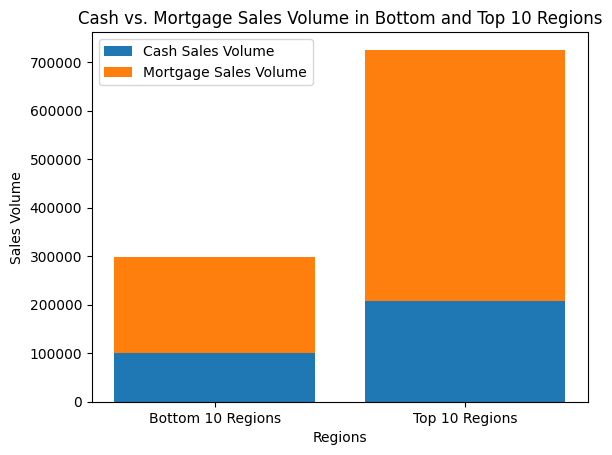

In [13]:
# Sum of CashSalesVolume  vs MortgageSalesVolume in Bottom 10 and Top 10 City_Region.

import matplotlib.pyplot as plt
bottom_10_cash_sales = UK_HPI1[UK_HPI1['City_Town'].isin(bottom_10.index)]['CashSalesVolume'].sum()
bottom_10_mortgage_sales = UK_HPI1[UK_HPI1['City_Town'].isin(bottom_10.index)]['MortgageSalesVolume'].sum()

top_10_cash_sales = UK_HPI1[UK_HPI1['City_Town'].isin(top_10.index)]['CashSalesVolume'].sum()
top_10_mortgage_sales = UK_HPI1[UK_HPI1['City_Town'].isin(top_10.index)]['MortgageSalesVolume'].sum()

# Create a bar chart
x = ['Bottom 10 Regions', 'Top 10 Regions']
y1 = [bottom_10_cash_sales, top_10_cash_sales]
y2 = [bottom_10_mortgage_sales, top_10_mortgage_sales]

plt.bar(x, y1, label='Cash Sales Volume')
plt.bar(x, y2, bottom=y1, label='Mortgage Sales Volume')

plt.title('Cash vs. Mortgage Sales Volume in Bottom and Top 10 Regions')
plt.xlabel('Regions')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()


2024: 300876.80
2025: 307567.82
2026: 315562.30
2027: 323556.79
2028: 331551.27
2029: 339545.76
2030: 347540.24
2031: 355534.72
2032: 363529.21
2032: 371523.69
2033: 379518.18


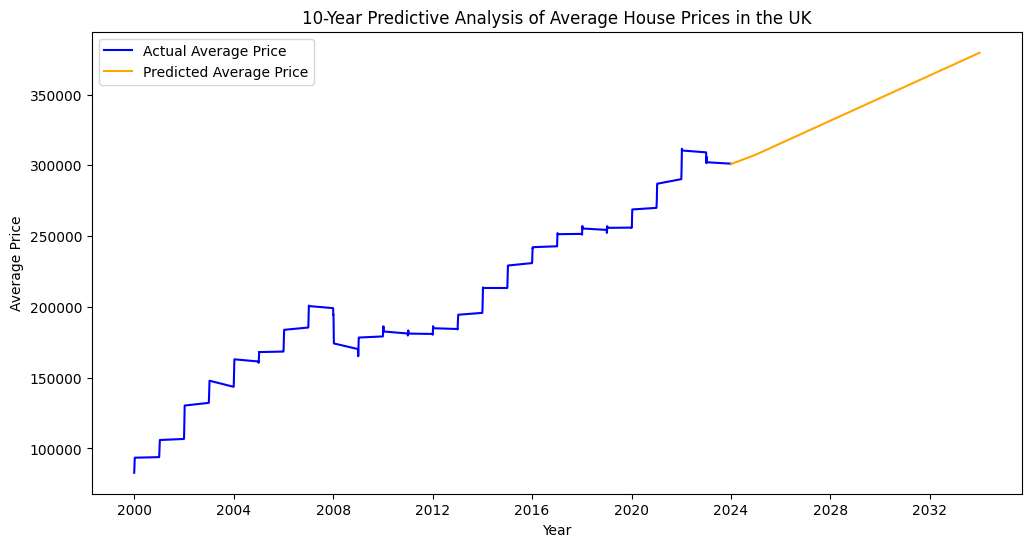

In [14]:
# Prdicting average prices for the next 10 years using linear regression model

# Convert dates to numerical representation (days since a reference date)
reference_date = aggregated_data['Date'].min()
aggregated_data['DaysSinceReference'] = (aggregated_data['Date'] - reference_date).dt.days

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(aggregated_data['DaysSinceReference'], aggregated_data['AveragePrice'], test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions for the next 10 years
next_10_years_num = []
current_date = aggregated_data['Date'].max()
for i in range(10):
    next_date = current_date + timedelta(days=365)
    days_since_reference = (next_date - reference_date).days
    next_10_years_num.append(days_since_reference)
    current_date = next_date

y_pred = model.predict(np.array(next_10_years_num).reshape(-1, 1))

# Convert numerical predictions back to dates for plotting
next_10_years_dates = [reference_date + timedelta(days=int(days)) for days in next_10_years_num]

# Include the last actual data point to connect the lines
last_actual_date = aggregated_data['Date'].max()
last_actual_price = aggregated_data.loc[aggregated_data['Date'] == last_actual_date, 'AveragePrice'].values[0]

# Adding the last actual data point to the predictions
next_10_years_dates.insert(0, last_actual_date)
y_pred = np.insert(y_pred, 0, last_actual_price)

# Print the predicted average prices for the next 10 years
for date, price in zip(next_10_years_dates, y_pred):
    print(f"{date.year}: {price:.2f}")

# Plot the actual and predicted average prices
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data['Date'], aggregated_data['AveragePrice'], label='Actual Average Price', color='blue')
plt.plot(next_10_years_dates, y_pred, label='Predicted Average Price', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('10-Year Predictive Analysis of Average House Prices in the UK')
plt.legend()
plt.show()
